In [45]:
import eyepy as ep
import numpy as np
import os
import matplotlib.pyplot as plt
def get_annotations(oct_read):
    # Outer Plexiform Layer: OPL
    OPL = np.round(
        oct_read.bscans[0].annotation["layers"]['OPL']).astype('uint16')
    INL = np.round(
        oct_read.bscans[0].annotation["layers"]['INL']).astype('uint16')
    # Ellipsoide Zone: EZ
    PR2 = np.round(
        oct_read.bscans[0].annotation["layers"]['PR2']).astype('uint16')
    PR1 = np.round(
        oct_read.bscans[0].annotation["layers"]['PR1']).astype('uint16')
    # BM
    BM = np.round(
        oct_read.bscans[0].annotation["layers"]['BM']).astype('uint16')
    # ELM
    ELM = np.round(
        oct_read.bscans[0].annotation["layers"]['ELM']).astype('uint16')
    # BM
    RPE = np.round(
        oct_read.bscans[0].annotation["layers"]['RPE']).astype('uint16') 
    return OPL, INL, PR2, PR1, BM, ELM, RPE



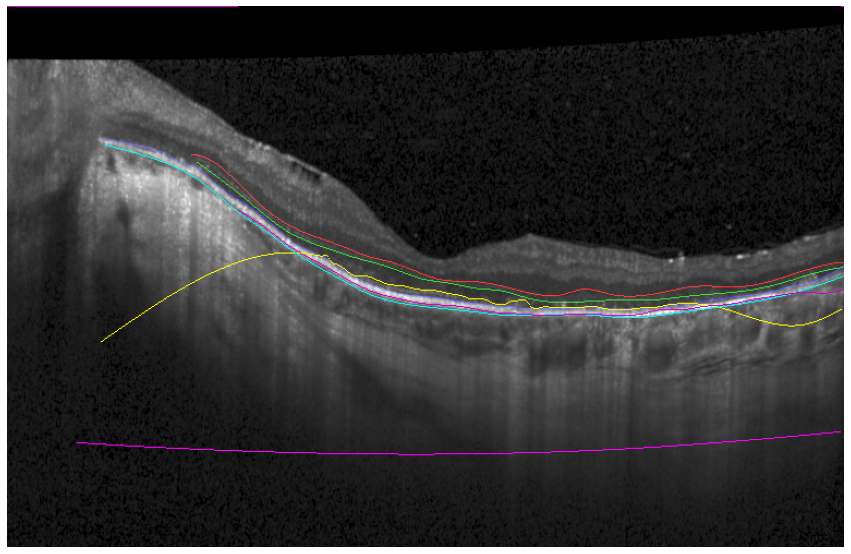

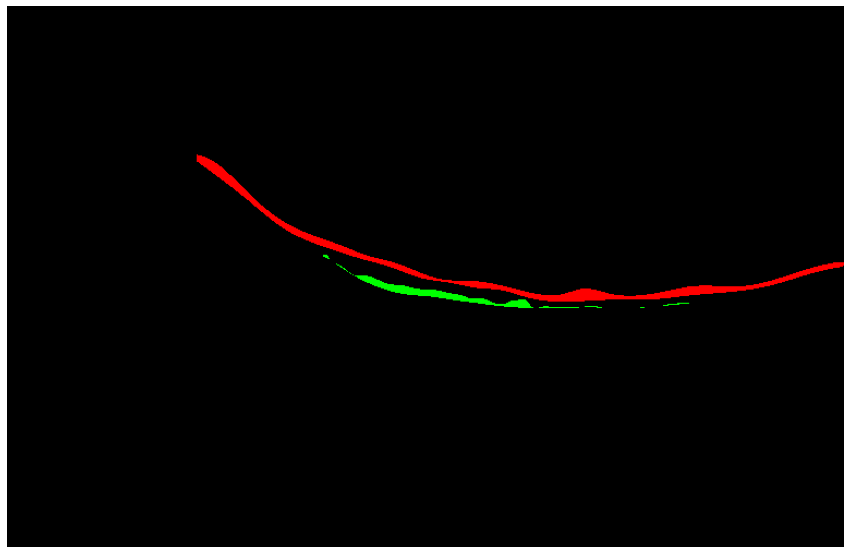

In [46]:
file = 'dataset/OCT3/IRD_RPE65_23_I_1874_0.vol'

ev = ep.Oct.from_heyex_vol(file)
OPL, INL, PR2, PR1, BM, ELM, RPE = get_annotations(ev)

data = ev.bscans[0].scan
data = np.expand_dims(data, axis=-1)

zeros = np.zeros((data.shape[0], data.shape[1], 3)).astype('uint8')
data1 = np.add(data, zeros)


# Generate ground truth
mask = np.zeros((data.shape[0], data.shape[1], 3)).astype('uint8')
for i in range(OPL.shape[0]):
    data1[INL[i], i, 0] = 255
    data1[OPL[i], i, 1] = 220
    data1[PR2[i], i, 2] = 255
    data1[PR1[i], i, :] = [255, 255, 0]
    data1[ELM[i], i, :] = [255, 0, 255]
    data1[BM[i], i, :] = [0, 255, 255]
    data1[RPE[i], i, :] = [200, 5, 200]

    mask[INL[i]:OPL[i], i, :] = [255, 0, 0]  if INL[i] <= OPL[i] and INL[i] > 0 and OPL[i] > 0 else mask[INL[i]:OPL[i], i]
    mask[PR1[i]:PR2[i], i, :] = [0, 255, 0]  if PR1[i] <= PR2[i] and PR1[i] > 0 and PR2[i] > 0 else mask[PR1[i]:PR2[i], i]
    mask[ELM[i]:PR1[i], i, :] = [0, 0, 255]  if ELM[i] <= PR1[i] and ELM[i] > 0 and PR1[i] > 0 else mask[ELM[i]:PR1[i], i]
    # mask[BM[i], i, :]  = [0, 255, 255]  if BM[i]  > 0 else mask[BM[i], i, :]
    # mask[RPE[i], i, :] = [200, 5, 200]  if RPE[i] > 0 else mask[RPE[i], i, :]

plt.figure(figsize=(15, 10))
plt.imshow(data1)
plt.axis('off')
plt.show()

plt.figure(figsize=(15, 10))
plt.imshow(mask)
plt.axis('off')
plt.show()


1


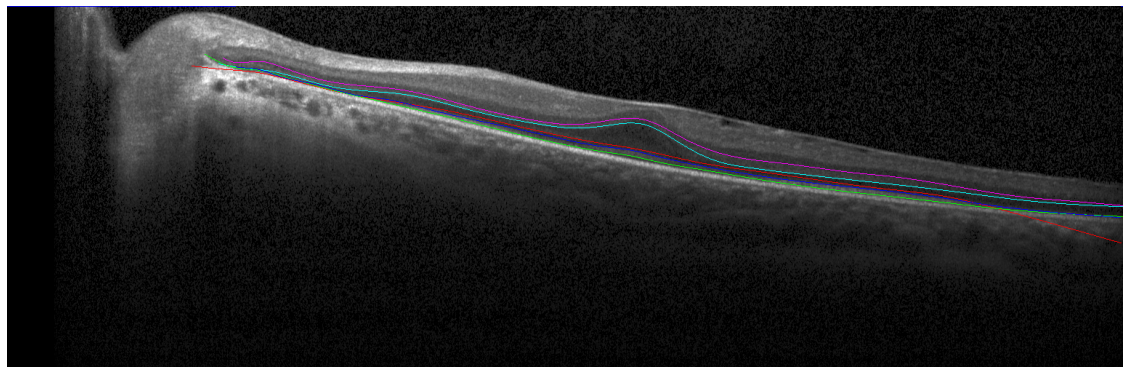

In [47]:
file = 'dataset/OCT3/IRD_RPE65_20_I_1435_6.vol'

ev = ep.Oct.from_heyex_vol(file)
print(len(ev.bscans))
n = 0
data = ev.bscans[n].scan
# plt.figure(figsize=(15, 10))
# plt.imshow(data, cmap='gray')
# plt.axis('off')
# plt.show()
# OPL = np.round(ev.bscans[0].annotation["layers"]['ILM']).astype('uint16')

BM = ev.bscans[n].annotation['layers']['BM'].astype('uint16')
RPE = ev.bscans[n].annotation['layers']['RPE'].astype('uint16')
ILM = ev.bscans[n].annotation['layers']['ILM'].astype('uint16')
NFL = ev.bscans[n].annotation['layers']['NFL'].astype('uint16')
GCL = ev.bscans[n].annotation['layers']['GCL'].astype('uint16')
ELM = ev.bscans[n].annotation['layers']['ELM'].astype('uint16')
IPL = ev.bscans[n].annotation['layers']['IPL'].astype('uint16')
PR2 = ev.bscans[n].annotation['layers']['PR2'].astype('uint16')
PR1 = ev.bscans[n].annotation['layers']['PR1'].astype('uint16')
OPL = ev.bscans[n].annotation['layers']['OPL'].astype('uint16')
INL = ev.bscans[n].annotation['layers']['INL'].astype('uint16')
data = np.expand_dims(data, axis=-1)
zeros = np.zeros((data.shape[0], data.shape[1], 3)).astype('uint8')
data1 = np.add(data, zeros)

for i in range(PR2.shape[0]):

    data1[ELM[i], i, :] = [255, 0, 0]

    data1[OPL[i], i, :] = [0, 255, 255]
    data1[INL[i], i, :] = [255, 0, 255]

    data1[PR2[i], i, :] = [0, 255, 0]
    data1[PR1[i], i, :] = [0, 0, 255]

    # data1[RPE[i], i, :] = [255, 0, 0]
    # data1[BM[i], i, :] = [255, 255, 0]
    
    

plt.figure(figsize=(20, 10))
plt.imshow(data1, cmap='gray')
plt.axis('off')
plt.show()

100


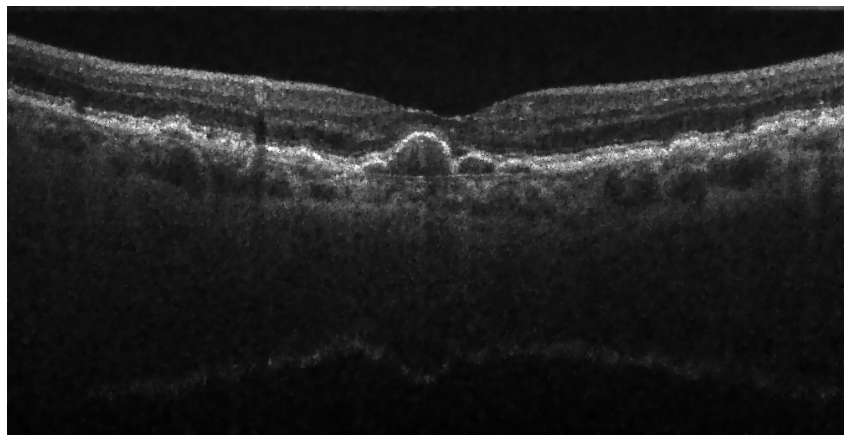

In [48]:
from skimage.restoration import denoise_tv_chambolle
file = 'dataset/AMD/Farsiu_Ophthalmology_2013_AMD_Subject_1064.mat'

def gray_gamma(img):
    gamma = 2
    gray = img / 255.
    out = np.array(255*(gray) ** gamma, dtype = 'uint8')
    return out

def tv_denoising(img):
    w = 0.06
    gray = img
    out = denoise_tv_chambolle(gray, weight=w)
    out = out * 255
    return out.astype(np.uint8)

ev = ep.Oct.from_duke_mat(file)
print(len(ev.bscans))
n = 50
data = ev.bscans[n].scan
data = gray_gamma(data)
data = tv_denoising(data)
plt.figure(figsize=(15, 10))
plt.imshow(data, cmap='gray')
plt.axis('off')
plt.show()


In [53]:
from PIL import Image
from tqdm import tqdm
def get_filenames(path, ext):
    X0 = []
    for i in sorted(os.listdir(path)):
        if i.endswith(ext):
            X0.append(os.path.join(path, i))
    return X0

def gray_gamma(img):
    gamma = 1.75
    gray = img / 255.
    out = np.array(255*(gray) ** gamma, dtype = 'uint8')
    return out

def tv_denoising(img):
    w = 0.05
    gray = img
    out = denoise_tv_chambolle(gray, weight=w)
    out = out * 255
    return out.astype(np.uint8)
import sys

def get_bscans(file):
    path = ''
    ev = ep.Oct.from_duke_mat(file)
    n = 50
    data = ev.bscans[n].scan
    data = gray_gamma(data)
    data = tv_denoising(data)
    img = Image.fromarray(data)
    # img.save('dataset/DUKE_bscans/Control/' + os.path.splitext(os.path.split(file)[1])[0] + '.png')
    img.save('duke_test_image2.png')
    sys.exit()

files = get_filenames('dataset/Control/', 'mat')

for i in tqdm(files):
    get_bscans(i)

  0%|          | 0/115 [00:00<?, ?it/s]


SystemExit: 